<a href="https://colab.research.google.com/github/Kravty/MachineLearning/blob/main/TensorFlow_2_0_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> CNN model in TensorFlow 2.0 used for classification of CIFAR10 dataset. 
<h2> Multiple convolution layers are used (VGG alike) in order to better accuracy.




<h3> Import of libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

<h3> Data preparation

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print(f'Shape of input train data is {x_train.shape}')
print(f'Shape of output train data is {y_train.shape}')

Shape of input train data is (50000, 32, 32, 3)
Shape of output train data is (50000, 1)


In [4]:
# Scaling the pixel values into 0 to 1 range
x_train, x_test = x_train / 255, x_test / 255

# Targets are 2D array instead of 1D. They should be flattened to fit TensorFlow format
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f'Shape of target train data is {y_train.shape}')

Shape of target train data is (50000,)


In [5]:
# Data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

<h3> Building the model

In [6]:
# Building the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x= Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 34s 17ms/step - loss: 1.9257 - accuracy: 0.3933 - val_loss: 1.0401 - val_accuracy: 0.6323
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 1.0425 - accuracy: 0.6345 - val_loss: 0.8381 - val_accuracy: 0.7094
Epoch 3/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.8621 - accuracy: 0.7015 - val_loss: 0.7894 - val_accuracy: 0.7252
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7568 - accuracy: 0.7405 - val_loss: 0.7182 - val_accuracy: 0.7604
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6942 - accuracy: 0.7630 - val_loss: 0.7184 - val_accuracy: 0.7685
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6446 - accuracy: 0.7795 - val_loss: 0.5999 - val_accuracy: 0.7995
Epoch 7/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.5946 - accuracy: 0.7960 - val_loss: 0.6192 -

<h3> Plotting the results

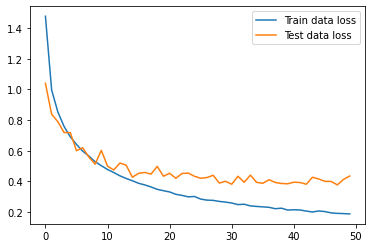

In [8]:
plt.plot(r.history['loss'], label='Train data loss')
plt.plot(r.history['val_loss'], label='Test data loss')
plt.legend();

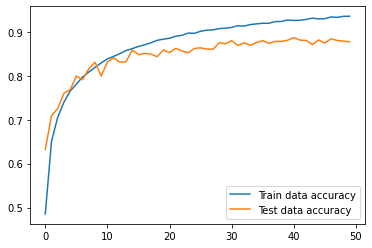

In [9]:
plt.plot(r.history['accuracy'], label='Train data accuracy')
plt.plot(r.history['val_accuracy'], label='Test data accuracy')
plt.legend();

Confusion matrix without normalization


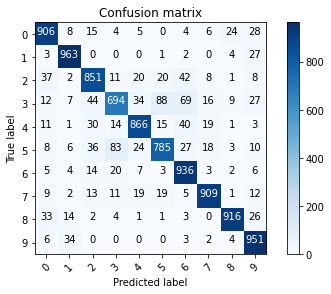

In [10]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

<h3> Error analysis

In [11]:
# Correcting the labels
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")

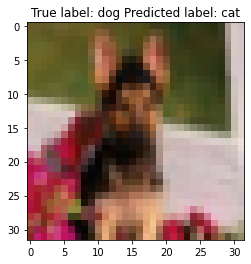

In [16]:
# Plotting sample misclassified results
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {labels[y_test[i]]} Predicted label: {labels[p_test[i]]}");